In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

C:\Users\91997\AppData\Local\Temp\ipykernel_3920\3494245256.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,Unnamed: 0,online_order,book_table,votes,location,cuisines,approx_cost(for two people),listed_in(type),type,rate
0,8615,1,0,670,9,38,500.0,2,4,3.9
1,29303,0,0,14710,29,51,900.0,1,8,4.7
2,2779,1,0,22,3,51,250.0,2,8,3.7
3,21109,1,0,80,21,51,750.0,4,4,3.5
4,44380,1,0,638,39,51,700.0,3,3,4.1


In [4]:
drop_col = ["Unnamed: 0","location"]

In [5]:
train_df.drop(drop_col, axis = 1, inplace = True)
test_df.drop(drop_col, axis = 1, inplace = True)

In [6]:
train_df.head()

,online_order,book_table,votes,cuisines,approx_cost(for two people),listed_in(type),type,rate
0,1,0,670,38,500.0,2,4,3.9
1,0,0,14710,51,900.0,1,8,4.7
2,1,0,22,51,250.0,2,8,3.7
3,1,0,80,51,750.0,4,4,3.5
4,1,0,638,51,700.0,3,3,4.1


In [7]:

X_train = train_df.drop("rate" , axis = 1)
y_train = train_df["rate"]
X_train

,online_order,book_table,votes,cuisines,approx_cost(for two people),listed_in(type),type
0,1,0,670,38,500.0,2,4
1,0,0,14710,51,900.0,1,8
2,1,0,22,51,250.0,2,8
3,1,0,80,51,750.0,4,4
4,1,0,638,51,700.0,3,3
...,...,...,...,...,...,...,...
32975,1,0,5,51,300.0,2,10
32976,1,0,16,10,350.0,4,9
32977,1,0,382,51,500.0,2,3
32978,1,0,9,14,300.0,1,3


In [8]:
X_test = test_df.drop("rate" , axis = 1)
y_test = test_df["rate"]
X_test

,online_order,book_table,votes,cuisines,approx_cost(for two people),listed_in(type),type
0,1,0,33,24,400.0,2,7
1,0,0,339,51,550.0,2,4
2,1,0,1133,51,800.0,1,3
3,0,0,44,38,300.0,4,8
4,1,0,64,18,700.0,2,8
...,...,...,...,...,...,...,...
8241,1,1,1854,18,1100.0,2,4
8242,0,0,7,51,300.0,2,6
8243,0,1,545,51,1100.0,4,4
8244,0,0,53,51,350.0,3,8


In [9]:
sc = MinMaxScaler()

In [10]:
X_train = sc.fit_transform(X_train)

In [11]:
X_test = sc.transform(X_test)

In [12]:
X_train

array([[1.00000000e+00, 0.00000000e+00, 3.98051331e-02, ...,
        7.71812081e-02, 3.33333333e-01, 4.00000000e-01],
       [0.00000000e+00, 0.00000000e+00, 8.73930608e-01, ...,
        1.44295302e-01, 1.66666667e-01, 8.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 1.30703422e-03, ...,
        3.52348993e-02, 3.33333333e-01, 8.00000000e-01],
       ...,
       [1.00000000e+00, 0.00000000e+00, 2.26948669e-02, ...,
        7.71812081e-02, 3.33333333e-01, 3.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 5.34695817e-04, ...,
        4.36241611e-02, 1.66666667e-01, 3.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 5.04990494e-03, ...,
        6.04026846e-02, 3.33333333e-01, 4.00000000e-01]])

In [13]:
X_test

array([[1.        , 0.        , 0.00196055, ..., 0.06040268, 0.33333333,
        0.7       ],
       [0.        , 0.        , 0.02014021, ..., 0.08557047, 0.33333333,
        0.4       ],
       [1.        , 0.        , 0.06731226, ..., 0.12751678, 0.16666667,
        0.3       ],
       ...,
       [0.        , 1.        , 0.0323788 , ..., 0.17785235, 0.66666667,
        0.4       ],
       [0.        , 0.        , 0.00314876, ..., 0.05201342, 0.5       ,
        0.8       ],
       [1.        , 0.        , 0.00142586, ..., 0.0352349 , 0.33333333,
        0.9       ]])

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

In [15]:
models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), ExtraTreesRegressor()]
     

In [16]:
scores = [] # used to store the r2 score 
errors = [] # used to store the error values :- errors[0] = [mse, mae]
model_names = [str(x) for x in models] # storing name of all using models 

In [17]:
for idx, model in enumerate(models):
  model.fit(X_train,y_train)
  score = model.score(X_test, y_test)
  y_pred = model.predict(X_test)
  mse = MSE(y_test, y_pred)
  mae = MAE(y_test, y_pred)

  scores.append(score)
  errors.append([mse, mae])

  print(f"{model_names[idx]}\n\n\tscore => {score}\n\tmse => {mse}\n\tmae => {mae}")
  print()
  

LinearRegression()

	score => 0.2979484055750947
	mse => 0.13631533378807503
	mae => 0.28705417467510147

SVR()

	score => 0.37268434427813857
	mse => 0.12180407206433252
	mae => 0.2612936989338529

DecisionTreeRegressor()

	score => 0.8170666098289798
	mse => 0.03551964889784767
	mae => 0.06948273285810388

RandomForestRegressor()

	score => 0.8611620222179546
	mse => 0.026957769819359406
	mae => 0.08467915530108637

ExtraTreesRegressor()

	score => 0.8494681631202694
	mse => 0.029228332722186338
	mae => 0.0740230900238331



In [18]:
model_metrics = pd.DataFrame({"models" : model_names,"MSE" : np.array(errors)[:,0], "MAE" :  np.array(errors)[:,1], "r2" : scores})
     

In [19]:
model_metrics["models"] = model_metrics["models"].str.split("(").str[0]
model_metrics

,models,MSE,MAE,r2
0,LinearRegression,0.136315,0.287054,0.297948
1,SVR,0.121804,0.261294,0.372684
2,DecisionTreeRegressor,0.035520,0.069483,0.817067
3,RandomForestRegressor,0.026958,0.084679,0.861162
4,ExtraTreesRegressor,0.029228,0.074023,0.849468


[Text(0.5, 1.0, 'Models Perfomance Evaluation')]

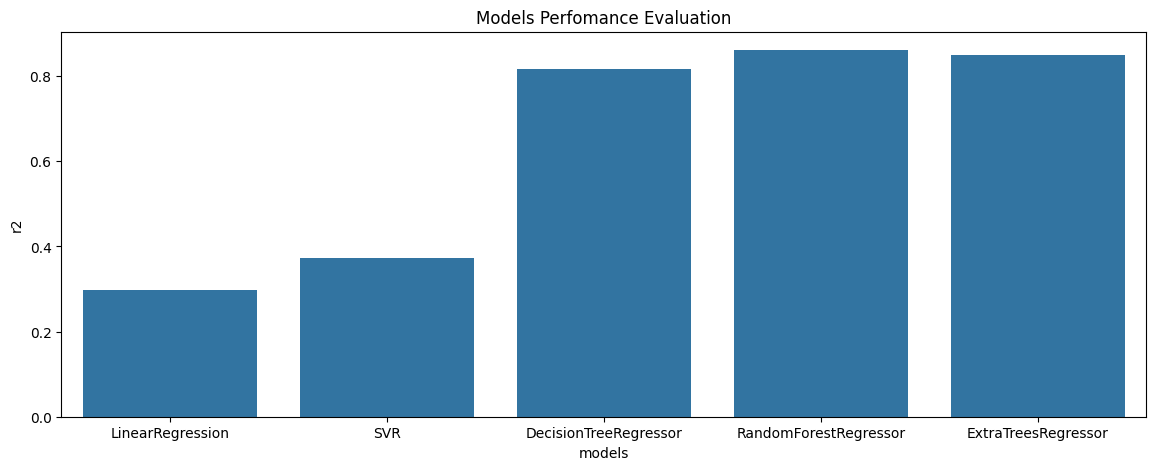

In [20]:
plt.figure(figsize=(14,5))
sns.barplot(data = model_metrics, x = "models" , y = "r2").set(title = "Models Perfomance Evaluation")
     

In [21]:

model_metrics.to_csv("model_metrics_and_scores.csv")

In [22]:

model = ExtraTreesRegressor()
model.fit(X_train,y_train)
print(f"Train r2 score => {model.score(X_train,y_train)}")
print()
print(f"Test r2 score => {model.score(X_test,y_test)}")

Train r2 score => 0.9735992749477724

Test r2 score => 0.8488232474073902


In [23]:

from sklearn.model_selection import GridSearchCV

In [24]:
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': range(50,126,25),        
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=2,
    verbose=2,
    n_jobs=-1 
)

In [25]:
grid_result = gsc.fit(X_train, y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


In [26]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
     

Best: 0.533843 using {'min_samples_leaf': 20, 'min_samples_split': 25, 'n_estimators': 50}


In [27]:
model = ExtraTreesRegressor(**grid_result.best_params_)

In [28]:

print(model)

ExtraTreesRegressor(min_samples_leaf=20, min_samples_split=25, n_estimators=50)


In [29]:

model.fit(X_train,y_train)

ExtraTreesRegressor(min_samples_leaf=20, min_samples_split=25, n_estimators=50)

In [30]:
model.score(X_train,y_train)

0.6213459710469591

In [31]:

model.score(X_test,y_test)

0.5922745261114362

In [32]:
import pickle

## save model
output = open('model.pkl', 'wb')
pickle.dump(model, output)
output.close()

##save normalizer
output = open('normalizer.pkl', 'wb')
pickle.dump(sc, output)
output.close()